<a href="https://colab.research.google.com/github/Ayush8795/major_project_backend/blob/main/BacteriaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Training and Defining

In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import os

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
data_path= '/content/GoogleDrive/MyDrive/dataset/dataset'

In [ ]:
classes= os.listdir(data_path)

In [ ]:
classes

['P.aeruginosa', 'S.aureus', 'E.coli', 'C.albicans', 'B.subtilis']

In [ ]:
import cv2

In [ ]:
data=[]
labels=[]

In [ ]:
for cls in classes:
  pth= os.path.join(data_path,cls)
  images= os.listdir(pth)
  print('Loading images of {}'.format(cls))
  for img in images:
    img_path= os.path.join(pth,img)
    # print(img_path)
    image= cv2.imread(img_path)
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,IMG_SIZE)
    # print(imag)
    data.append(image)
    labels.append(cls)

Loading images of P.aeruginosa
Loading images of S.aureus
Loading images of E.coli
Loading images of C.albicans
Loading images of B.subtilis


In [ ]:
labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split as tts

In [ ]:
lb= LabelBinarizer()
lab= lb.fit_transform(labels)

In [ ]:
X= np.array(data)
Y= np.array(lab)

In [ ]:
lab

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [ ]:
x_train,x_test,y_train,y_test= tts(X,Y,random_state=42,test_size=0.2)

In [ ]:
len(y_test)

110

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
traug= ImageDataGenerator(
    rotation_range= 30,
    zoom_range= 0.15,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest")
valaug= ImageDataGenerator()

## VGG19 Model

In [ ]:
# Load the pre-trained InceptionV3 model
base_model = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet'
)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
#Neural network
# from tensorflow.keras.applications import ResNet50
from keras.layers import Input
# from keras.layers.pooling import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

In [ ]:
# headModel= base_model.output
# headModel= layers.MaxPooling2D(pool_size= (7,7))(headModel)
# headModel= Flatten(name= "flatten")(headModel)
# headModel= Dense(512,activation= "relu")(headModel)
# headModel= Dropout(0.5)(headModel)
# headModel= Dense(len(lb.classes_), activation= 'softmax')(headModel)
# model= Model(inputs= baseModel.input, outputs= headModel)

In [ ]:
datAug = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal')
], name="data_augmentation")

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = datAug(inputs)
x = base_model(x, training=True)
x = layers.GlobalMaxPooling2D()(x)#for region specific feature extraction
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)#good for adapting the features and pattern recognition
model = tf.keras.models.Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
x_train

array([[[[143, 132,  87],
         [134, 122,  84],
         [131, 119,  77],
         ...,
         [129, 123,  91],
         [150, 143, 114],
         [143, 136, 107]],

        [[124, 112,  74],
         [143, 133,  86],
         [137, 125,  83],
         ...,
         [120, 113,  85],
         [128, 121,  92],
         [140, 133, 104]],

        [[124, 109,  66],
         [132, 118,  78],
         [143, 130,  86],
         ...,
         [132, 123,  93],
         [129, 120,  89],
         [141, 132, 101]],

        ...,

        [[215, 202, 147],
         [193, 180, 128],
         [181, 163, 108],
         ...,
         [177, 155, 118],
         [205, 181, 137],
         [188, 165, 124]],

        [[179, 164, 107],
         [208, 193, 137],
         [221, 204, 148],
         ...,
         [198, 174, 136],
         [176, 154, 113],
         [153, 130,  94]],

        [[199, 180, 121],
         [179, 159, 106],
         [200, 183, 127],
         ...,
         [169, 145, 107],
        

In [ ]:
# Train the model
his= model.fit(
    traug.flow(x_train,y_train,batch_size=BATCH_SIZE),
    epochs=60,
    batch_size= BATCH_SIZE,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    validation_data= valaug.flow(x_test,y_test,batch_size=BATCH_SIZE),
    validation_steps=len(x_test)//BATCH_SIZE
)

Epoch 1/60
27/27 [==============================] - 33s 507ms/step - loss: 4.1959 - accuracy: 0.2328 - val_loss: 1.5408 - val_accuracy: 0.2500
Epoch 2/60
27/27 [==============================] - 8s 302ms/step - loss: 1.5484 - accuracy: 0.3017 - val_loss: 1.5096 - val_accuracy: 0.2188
Epoch 3/60
27/27 [==============================] - 8s 276ms/step - loss: 1.1570 - accuracy: 0.5511 - val_loss: 0.9943 - val_accuracy: 0.5833
Epoch 4/60
27/27 [==============================] - 9s 334ms/step - loss: 1.0875 - accuracy: 0.5463 - val_loss: 1.1217 - val_accuracy: 0.4583
Epoch 5/60
27/27 [==============================] - 8s 283ms/step - loss: 0.8628 - accuracy: 0.6105 - val_loss: 0.9495 - val_accuracy: 0.6354
Epoch 6/60
27/27 [==============================] - 9s 346ms/step - loss: 0.7592 - accuracy: 0.6817 - val_loss: 0.6088 - val_accuracy: 0.7604
Epoch 7/60
27/27 [==============================] - 8s 291ms/step - loss: 0.8750 - accuracy: 0.6461 - val_loss: 0.6738 - val_accuracy: 0.7083
Epoch

##Saving Model

In [ ]:
model.save('/content/GoogleDrive/MyDrive/dataset/models/kvggmodel2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import joblib
joblib.dump(model,'/content/GoogleDrive/MyDrive/dataset/models/vggmodel2.joblib')

['/content/GoogleDrive/MyDrive/dataset/models/vggmodel2.joblib']

In [ ]:
import matplotlib.pyplot as plt

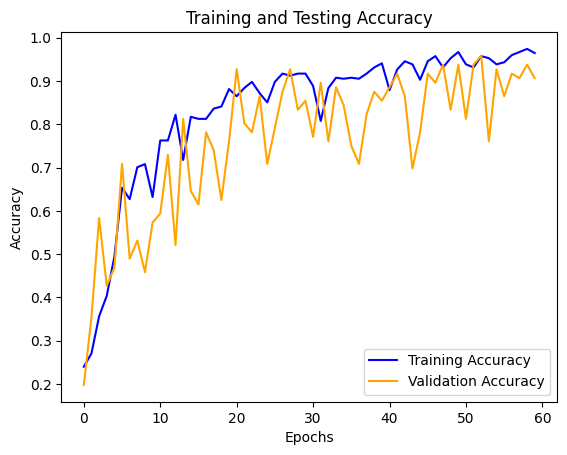

In [ ]:
plt.plot(his.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(his.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 5)                 2565      
                                                                 
Total params: 20026949 (76.40 MB)
Trainable params: 2002694

In [ ]:
from keras.utils import plot_model

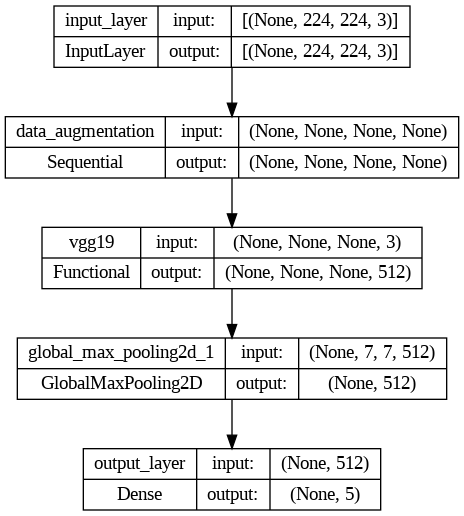

In [ ]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
plot_model(
    model,
    to_file='model_plot_3d.png',
    expand_nested=True,
    show_shapes=True,
    show_layer_names=True
)

##Inception Model

In [ ]:
# Load the pre-trained InceptionV3 model
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet'
)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
#Neural network
# from tensorflow.keras.applications import ResNet50
from keras.layers import Input
# from keras.layers.pooling import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

In [ ]:
datAug = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal')
], name="data_augmentation")

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = datAug(inputs)
x = base_model(x, training=True)
x = layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)
model = tf.keras.models.Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# Train the model
hist= model.fit(
    traug.flow(x_train,y_train,batch_size=BATCH_SIZE),
    epochs=60,
    batch_size= BATCH_SIZE,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    validation_data= valaug.flow(x_test,y_test,batch_size=BATCH_SIZE),
    validation_steps=len(x_test)//BATCH_SIZE
)

Epoch 1/60
27/27 [==============================] - 59s 404ms/step - loss: 1.5227 - accuracy: 0.4977 - val_loss: 1.3099 - val_accuracy: 0.5938
Epoch 2/60
27/27 [==============================] - 14s 523ms/step - loss: 0.7991 - accuracy: 0.6912 - val_loss: 0.8995 - val_accuracy: 0.6771
Epoch 3/60
27/27 [==============================] - 6s 215ms/step - loss: 0.6087 - accuracy: 0.7648 - val_loss: 0.5850 - val_accuracy: 0.7500
Epoch 4/60
27/27 [==============================] - 8s 304ms/step - loss: 0.5681 - accuracy: 0.7862 - val_loss: 0.8151 - val_accuracy: 0.8125
Epoch 5/60
27/27 [==============================] - 6s 215ms/step - loss: 0.4855 - accuracy: 0.8456 - val_loss: 0.6533 - val_accuracy: 0.8229
Epoch 6/60
27/27 [==============================] - 11s 403ms/step - loss: 0.4675 - accuracy: 0.8100 - val_loss: 0.4721 - val_accuracy: 0.8125
Epoch 7/60
27/27 [==============================] - 6s 223ms/step - loss: 0.4588 - accuracy: 0.8361 - val_loss: 0.4921 - val_accuracy: 0.8333
Epo

##Saving IV3 model

In [ ]:
model.save('/content/GoogleDrive/MyDrive/dataset/models/kiv3model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import joblib
joblib.dump(model,'/content/GoogleDrive/MyDrive/dataset/models/iv3model2.joblib')

['/content/GoogleDrive/MyDrive/dataset/models/iv3model2.joblib']

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                           

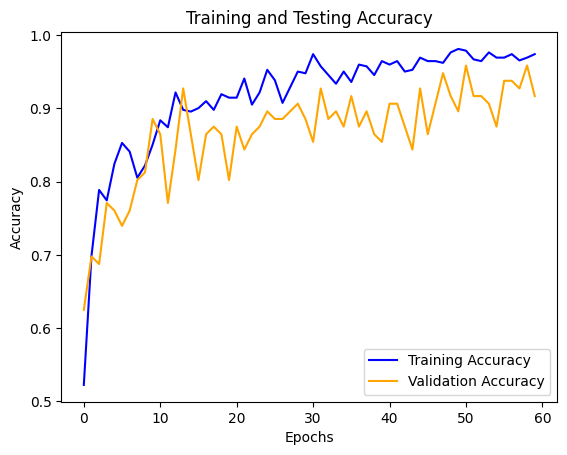

In [ ]:
plt.plot(hist.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

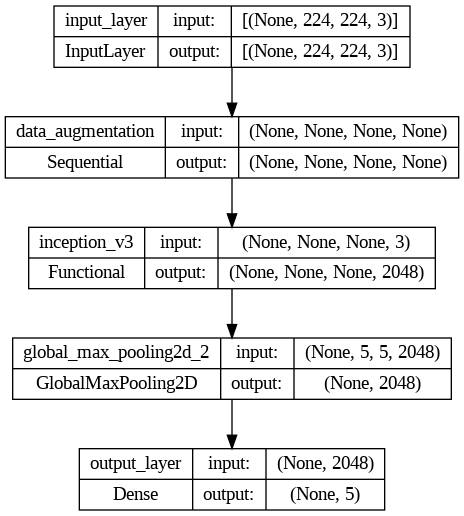

In [ ]:
plot_model(model,to_file='model_plot_iv3.png',show_shapes=True,show_layer_names=True)

##Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modell= load_model('/content/GoogleDrive/MyDrive/dataset/models/kvggmodel2.h5')

In [ ]:
import joblib

In [ ]:
model1= joblib.load('/content/GoogleDrive/MyDrive/dataset/models/vggmodel2.joblib')
# model2= joblib.load('/content/GoogleDrive/MyDrive/dataset/models/iv3model.pkl')

In [ ]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/x_train.npy',x_train)

In [ ]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/x_test.npy',x_test)

In [ ]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/y_train.npy',y_train)

In [ ]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/y_test.npy',x_test)

In [ ]:
preds1 = model1.predict(x_test)
preds2 = model2.predict(x_test)

4/4 [==============================] - 4s 378ms/step


In [ ]:
ensemble_preds = (preds1 + preds2) / 2

In [ ]:
ensemble_accuracy = np.mean(ensemble_preds == y_test)

In [ ]:
ensemble_accuracy

0.005454545454545455

##Test

In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [ ]:
import joblib

In [ ]:
model1= joblib.load("/content/GoogleDrive/MyDrive/dataset/models/iv3model2.joblib")

In [ ]:
model2= joblib.load("/content/GoogleDrive/MyDrive/dataset/models/vggmodel2.joblib")

In [ ]:
IMG_SIZE = (224, 224)

In [ ]:
import cv2
import numpy as np
import pandas as pd


In [ ]:
image= cv2.imread('/content/GoogleDrive/MyDrive/dataset/dataset/P.aeruginosa/13263.jpg')
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image= cv2.resize(image,IMG_SIZE)
image= np.expand_dims(image,axis=0)

In [ ]:
pred= model1.predict(image)

1/1 [==============================] - 0s 31ms/step


In [ ]:
pred

array([[0.25424418, 0.06019871, 0.02792376, 0.07626317, 0.5813702 ]],
      dtype=float32)

In [ ]:
import os
os.listdir('/content/GoogleDrive/MyDrive/dataset/dataset')

['P.aeruginosa', 'S.aureus', 'E.coli', 'C.albicans', 'B.subtilis']

In [ ]:
classes= ['B.subtilis', 'C.albicans', 'E.coli', 'P.aeruginosa', 'S.aureus']

In [ ]:
ind=np.argmax(pred)

In [ ]:
pred[0][ind]

0.5813702

In [ ]:
pred2= model2.predict(image)

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred2

array([[1.4621975e-05, 1.5634190e-05, 9.4311632e-04, 9.9770725e-01,
        1.3193991e-03]], dtype=float32)

In [ ]:
ind2=np.argmax(pred2)

In [ ]:
pred2[0][ind2]

0.99770725

In [ ]:
ind2

3

In [ ]:
classes[ind]

'S.aureus'

In [ ]:
classes[ind2]

'P.aeruginosa'

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 3s 77ms/step - loss: 0.2253 - accuracy: 0.9273


[0.22531209886074066, 0.9272727370262146]

In [ ]:
preds1

##Prediction Function

In [ ]:
from google.colab import drive
drive.mount('./GoogleDrive')

Mounted at ./GoogleDrive


In [ ]:
import numpy as np
import joblib
import cv2

In [ ]:
model1= joblib.load("/content/GoogleDrive/MyDrive/dataset/models/iv3model2.joblib")

In [ ]:
model2= joblib.load("/content/GoogleDrive/MyDrive/dataset/models/vggmodel2.joblib")

In [ ]:
IMG_SIZE = (224, 224)

In [ ]:
def predict(img_path):
  image= cv2.imread(img_path)
  image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,IMG_SIZE)
  image= np.expand_dims(image,axis=0)
  pred1= model1.predict(image)
  pred2= model2.predict(image)
  ind1= np.argmax(pred1)
  ind2= np.argmax(pred2)
  classes= ['B.subtilis', 'C.albicans', 'E.coli', 'P.aeruginosa', 'S.aureus']
  prediction=''
  if pred1[0][ind1]>pred2[0][ind2]:
    prediction= classes[ind1]
  else:
    prediction= classes[ind2]
  return prediction

In [ ]:
path= '/content/GoogleDrive/MyDrive/dataset/dataset/C.albicans/15753.jpg'
text= predict(path)

1/1 [==============================] - 1s 875ms/step


In [ ]:
text

'C.albicans'

In [ ]:
import tensorflow

In [ ]:
tensorflow.keras.models.save_model(model1,"/content/GoogleDrive/MyDrive/major_project/iv3model.h5")
tensorflow.keras.models.save_model(model2,"vggmodel.h5")


<ipython-input-12-80231290e78a>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tensorflow.keras.models.save_model(model1,"/content/GoogleDrive/MyDrive/major_project/iv3model.h5")
<ipython-input-12-80231290e78a>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tensorflow.keras.models.save_model(model2,"vggmodel.h5")


In [ ]:
from google.colab.patches import cv2_imshow

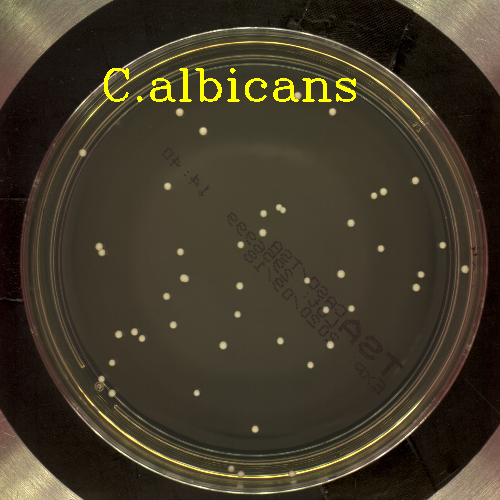

-1

In [ ]:
import cv2
image= cv2.imread(path)
image= cv2.resize(image,(500,500))
cv2.putText(image,text,(100,100),cv2.FONT_HERSHEY_COMPLEX,1.5,(0,255,255),2)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
import joblib

In [ ]:
joblib.__version__

'1.4.2'

In [ ]:
pip freeze > requirements.txt

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import numpy
numpy.__version__

'1.25.2'